In [1]:
import chainer
import pandas as pd

In [2]:
chainer.print_runtime_info()

Platform: Linux-5.4.0-77-generic-x86_64-with-Ubuntu-18.04-bionic
Chainer: 7.8.0
ChainerX: Not Available
NumPy: 1.19.5
CuPy:
  CuPy Version          : 7.8.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10010
  CUDA Driver Version   : 11010
  CUDA Runtime Version  : 10010
  cuBLAS Version        : 10201
  cuFFT Version         : 10101
  cuRAND Version        : 10101
  cuSOLVER Version      : (10, 2, 0)
  cuSPARSE Version      : 10300
  NVRTC Version         : (10, 1)
  cuDNN Build Version   : 7605
  cuDNN Version         : 7605
  NCCL Build Version    : 2708
  NCCL Runtime Version  : 2708
  CUB Version           : None
  cuTENSOR Version      : None
iDeep: Not Available


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv', header=None)

In [4]:
train.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [87]:
train

,datetime,y,week,soldout,name,kcal,remarks,payday,weather,precipitation,temperature,fun,in_curry,event_キャリアアップ支援セミナー,event_ママの会,event_nan
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,0.0,快晴,0,19.8,0,0,0,0,1
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,0.0,快晴,0,17.0,0,0,0,0,1
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,0.0,快晴,0,15.5,0,0,0,0,1
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,0.0,快晴,0,15.2,0,0,0,0,1
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,0.0,快晴,0,16.1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,0.0,曇,0,24.8,0,0,0,0,1
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,0.0,曇,0,25.4,0,0,0,0,1
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,0.0,晴れ,0,27.1,0,0,1,0,0
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,0.0,快晴,0,26.6,0,0,0,0,1


In [101]:
train.isnull().sum()

datetime                 0
y                        0
week                     0
soldout                  0
name                     0
kcal                     0
remarks                186
payday                   0
weather                  0
precipitation            0
temperature              0
fun                      0
in_curry                 0
event_キャリアアップ支援セミナー      0
event_ママの会               0
event_nan                0
kodawari_menu            0
dtype: int64

In [97]:
train = train.fillna({'kcal': train['kcal'].mean()})

In [64]:
#train['event'].value_counts()
train = pd.get_dummies(train, columns=['event'], dummy_na=True)
#pd.get_dummies(df_this_race_data, columns=['所属'])
test = pd.get_dummies(test, columns=['event'], dummy_na=True)

In [52]:
train = train.fillna({'payday':0})
test = test.fillna({'payday':0})

In [72]:
train.describe()

,y,soldout,kcal,payday,temperature,fun,in_curry,event_キャリアアップ支援セミナー,event_ママの会,event_nan
count,207.000000,207.000000,166.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,86.623188,0.449275,404.409639,0.048309,19.252174,0.057971,0.082126,0.024155,0.043478,0.932367
std,32.882448,0.498626,29.884641,0.214939,8.611365,0.234255,0.275222,0.153901,0.204425,0.251724
min,29.000000,0.000000,315.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,386.000000,0.000000,11.550000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,78.000000,0.000000,408.500000,0.000000,19.800000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,113.000000,1.000000,426.000000,0.000000,26.100000,0.000000,0.000000,0.000000,0.000000,1.000000
max,171.000000,1.000000,462.000000,1.000000,34.600000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12461 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12503 missing from current font.
  font.set_

<AxesSubplot:title={'center':'弁当データ ペアプロット'}>

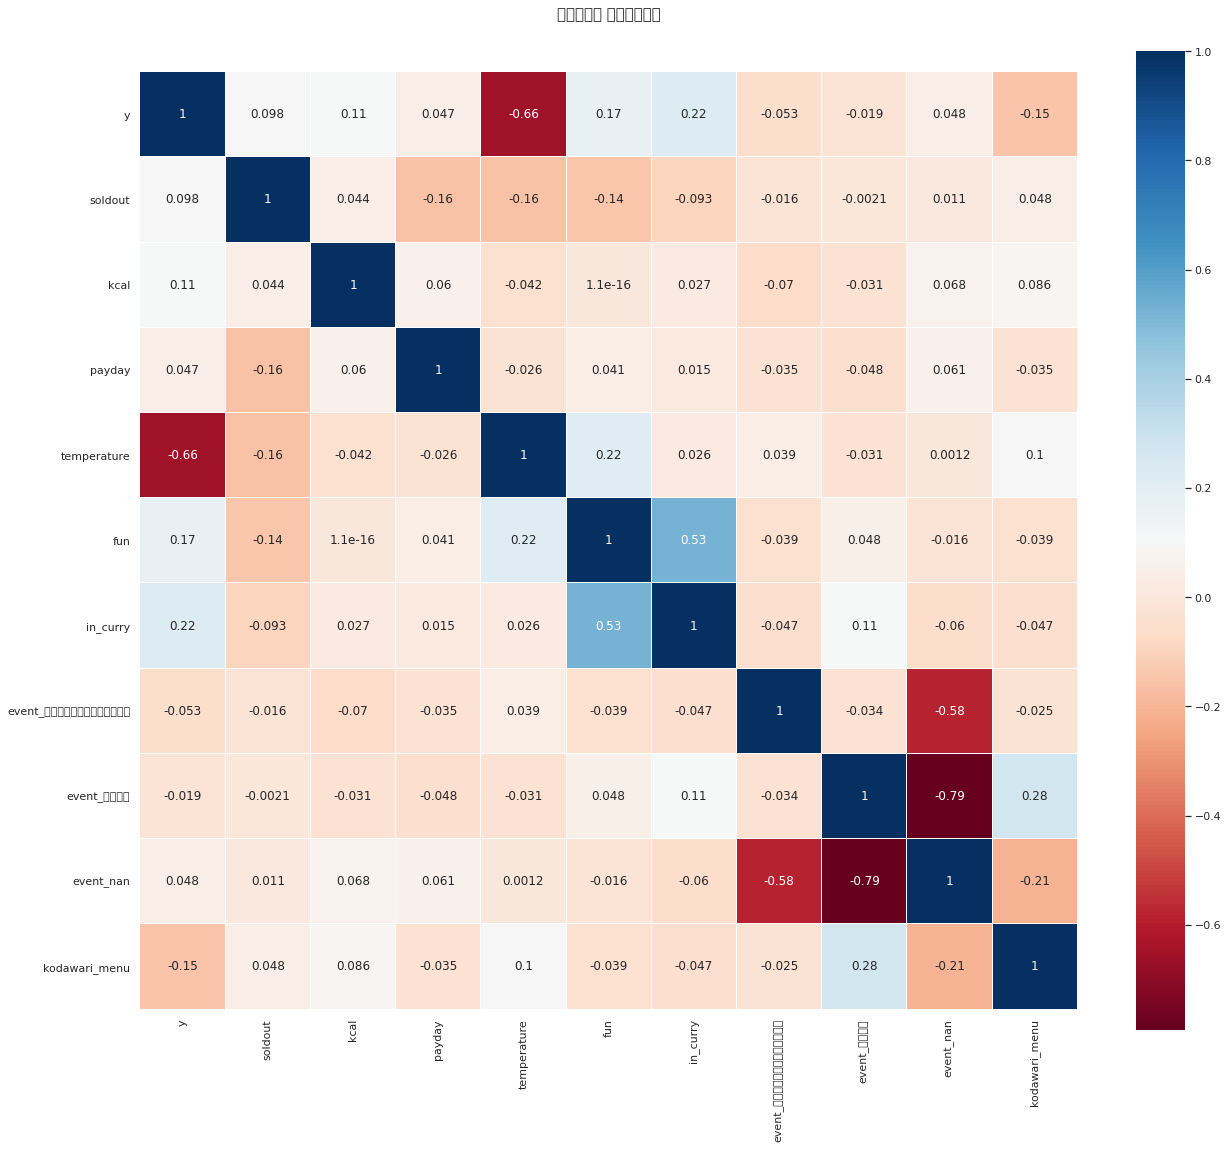

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

colormap = plt.cm.RdBu
plt.figure(figsize=(21, 18))
plt.title('弁当データ ペアプロット', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [91]:
train['remarks'].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
スペシャルメニュー（800円）              1
手作りの味                        1
酢豚（28食）、カレー（85食）             1
Name: remarks, dtype: int64

In [89]:
train[train['remarks']=='手作りの味']

,datetime,y,week,soldout,name,kcal,remarks,payday,weather,precipitation,temperature,fun,in_curry,event_キャリアアップ支援セミナー,event_ママの会,event_nan
188,2014-9-2,68,火,1,名古屋味噌カツ,440.0,手作りの味,0.0,晴れ,0,29.1,0,0,0,0,1


In [83]:
train.query('soldout==1')

,datetime,y,week,soldout,name,kcal,remarks,payday,weather,precipitation,temperature,fun,in_curry,event_キャリアアップ支援セミナー,event_ママの会,event_nan
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,0.0,快晴,0,17.0,0,0,0,0,1
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,0.0,快晴,0,15.2,0,0,0,0,1
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,0.0,快晴,0,16.1,0,0,0,0,1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,0.0,曇,0,14.6,0,0,0,0,1
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,0.0,晴れ,0,14.7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2014-9-2,68,火,1,名古屋味噌カツ,440.0,手作りの味,0.0,晴れ,0,29.1,0,0,0,0,1
190,2014-9-4,54,木,1,チキンステーキ・きのこソース,405.0,NaN,0.0,曇,0,26.5,0,0,0,0,1
192,2014-9-8,68,月,1,鶏肉の山賊焼き,385.0,NaN,0.0,曇,0,23.1,0,0,0,0,1
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,0.0,曇,0,24.8,0,0,0,0,1


In [7]:
#train['temperature'].value_counts()
train['precipitation'] = train['precipitation'].apply(lambda x: '0' if x=='--' else x)

In [8]:
# 湿度'--'の置換
train['precipitation'].unique()

array(['0', '0.5', '1.5', '1', '6', '6.5', '2.5'], dtype=object)

In [99]:
# remarks カラム
def jisaku1(x):
    if x == 'お楽しみメニュー':
        return 1
    else:
        return 0

def cooking_papas_menu(x):
    if x == '料理長のこだわりメニュー':
        return 1
    else:
        return 0
    
def is_curry(x):
    if 'カレー' in x:
        return 1
    else:
        return 0

In [10]:
train['fun'] = train['remarks'].apply(lambda x: jisaku1(x))
test['fun'] = test['remarks'].apply(lambda x: jisaku1(x))

In [100]:
train['kodawari_menu'] = train['remarks'].apply(lambda x: cooking_papas_menu(x))
test['kodawari_menu'] = test['remarks'].apply(lambda x: cooking_papas_menu(x))

In [31]:
# 'カレー'という文字が入ってるか調べる
#train['name'][train['name'].str.contains('カレー')]
#train['name'].str.contains('カレー')
print(type(train['name'].str.contains('カレー')))

<class 'pandas.core.series.Series'>


In [38]:
train['in_curry'] = train['name'].apply(lambda x: is_curry(x))
test['in_curry'] = test['name'].apply(lambda x: is_curry(x))

In [43]:
print(train['in_curry'].value_counts())
print(test['in_curry'].value_counts())

0    190
1     17
Name: in_curry, dtype: int64
0    37
1     3
Name: in_curry, dtype: int64


In [3]:
from sklearn.datasets import load_iris

# Iris データセットの読み込み
x, t = load_iris(return_X_y=True)

print('x:', x.shape)
print('t:', t.shape)

x: (150, 4)
t: (150,)


In [4]:
# それぞれデータ型を変換
x = x.astype('float32')
t = t.astype('int32')

In [5]:
# データセットを分割するモジュールの読み込み
from sklearn.model_selection import train_test_split

x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [6]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=0)


In [31]:
len(x_train_val)

105

In [7]:
import chainer.links as L
import chainer.functions as F

In [11]:
# 入力次元数が 3、出力次元数が 2 の全結合層
l = L.Linear(3, 2)


In [12]:
from chainer import Sequential

# net としてインスタンス化
n_input = 4
n_hidden = 10
n_output = 3

net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

In [13]:
optimizer = chainer.optimizers.SGD(lr=0.01)

In [14]:
optimizer.setup(net)

In [15]:
n_epoch = 30
n_batchsize = 16

In [16]:
import numpy as np

In [17]:
iteration = 0

# ログの保存用
results_train = {
    'loss': [],
    'accuracy': []
}
results_valid = {
    'loss': [],
    'accuracy': []
}


for epoch in range(n_epoch):

    # データセット並べ替えた順番を取得
    order = np.random.permutation(range(len(x_train)))

    # 各バッチ毎の目的関数の出力と分類精度の保存用
    loss_list = []
    accuracy_list = []

    for i in range(0, len(order), n_batchsize):
        # バッチを準備
        index = order[i:i+n_batchsize]
        x_train_batch = x_train[index,:]
        t_train_batch = t_train[index]

        # 予測値を出力
        y_train_batch = net(x_train_batch)

        # 目的関数を適用し、分類精度を計算
        loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
        accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)

        loss_list.append(loss_train_batch.array)
        accuracy_list.append(accuracy_train_batch.array)

        # 勾配のリセットと勾配の計算
        net.cleargrads()
        loss_train_batch.backward()

        # パラメータの更新
        optimizer.update()

        # カウントアップ
        iteration += 1

    # 訓練データに対する目的関数の出力と分類精度を集計
    loss_train = np.mean(loss_list)
    accuracy_train = np.mean(accuracy_list)

    # 1エポック終えたら、検証データで評価
    # 検証データで予測値を出力
    with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
        y_val = net(x_val)

    # 目的関数を適用し、分類精度を計算
    loss_val = F.softmax_cross_entropy(y_val, t_val)
    accuracy_val = F.accuracy(y_val, t_val)

    # 結果の表示
    print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(
        epoch, iteration, loss_train, loss_val.array))

    # ログを保存
    results_train['loss'] .append(loss_train)
    results_train['accuracy'] .append(accuracy_train)
    results_valid['loss'].append(loss_val.array)
    results_valid['accuracy'].append(accuracy_val.array)

epoch: 0, iteration: 5, loss (train): 1.8457, loss (valid): 1.2057
epoch: 1, iteration: 10, loss (train): 1.1289, loss (valid): 1.0227
epoch: 2, iteration: 15, loss (train): 0.9660, loss (valid): 1.0376
epoch: 3, iteration: 20, loss (train): 0.9348, loss (valid): 1.0535
epoch: 4, iteration: 25, loss (train): 0.9404, loss (valid): 1.0309
epoch: 5, iteration: 30, loss (train): 0.9345, loss (valid): 1.0200
epoch: 6, iteration: 35, loss (train): 0.9142, loss (valid): 1.0038
epoch: 7, iteration: 40, loss (train): 0.9031, loss (valid): 0.9934
epoch: 8, iteration: 45, loss (train): 0.9028, loss (valid): 0.9528
epoch: 9, iteration: 50, loss (train): 0.8822, loss (valid): 0.9727
epoch: 10, iteration: 55, loss (train): 0.8757, loss (valid): 0.9379
epoch: 11, iteration: 60, loss (train): 0.8841, loss (valid): 0.9014
epoch: 12, iteration: 65, loss (train): 0.8608, loss (valid): 0.9095
epoch: 13, iteration: 70, loss (train): 0.8446, loss (valid): 0.9032
epoch: 14, iteration: 75, loss (train): 0.844

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


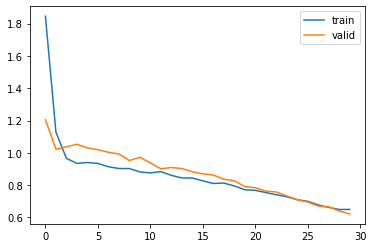

In [19]:
# 目的関数の出力 (loss)
plt.plot(results_train['loss'], label='train')  # label で凡例の設定
plt.plot(results_valid['loss'], label='valid')  # label で凡例の設定
plt.legend()  # 凡例の表示

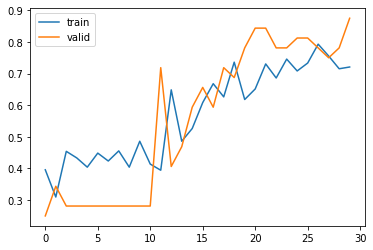

In [20]:
# 分類精度 (accuracy)
plt.plot(results_train['accuracy'], label='train')  # label で凡例の設定
plt.plot(results_valid['accuracy'], label='valid')  # label で凡例の設定
plt.legend()  # 凡例の表示

In [21]:
# テストデータで予測値を計算
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    y_test = net(x_test)

In [22]:
accuracy_test = F.accuracy(y_test, t_test)
accuracy_test.array

array(0.73333335, dtype=float32)

In [23]:
chainer.serializers.save_npz('my_iris.net', net)

In [24]:
# 14.4. 訓練済みネットワークを用いた推論
loaded_net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

In [25]:
chainer.serializers.load_npz('my_iris.net', loaded_net)

In [26]:
with chainer.using_config('train', False), chainer.using_config('enable_backprop', False):
    y_test = loaded_net(x_test)

In [27]:
np.argmax(y_test[0,:].array)

2